In [3]:
import pandas
import configparser
import psycopg2

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [5]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [4]:
sql = 'select * from student'

In [7]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p3,postgresql
1,p3,mongodb
2,p3,twitter
3,p3,facebook


In [6]:
sql = """
    select professor.p_name,course.c_name
    from professor
    inner join course
    on professor.p_email = course.p_email
"""

In [8]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p3,postgresql
1,p3,mongodb
2,p3,twitter
3,p3,facebook


In [9]:
sql = """
    select count(*) as num_student, c_number
    from enroll
    group by c_number
    """

<AxesSubplot:xlabel='c_number'>

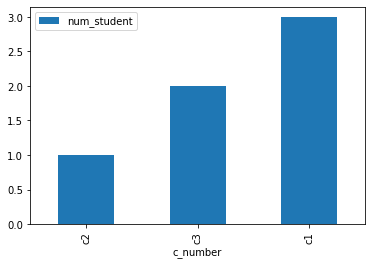

In [11]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number', y='num_student')

In [12]:
sql = """
    select professor.p_name,count(*) as num_course
    from professor
    inner join course
    on professor.p_email = course.p_email
    group by professor.p_name
    
"""

<AxesSubplot:xlabel='p_name'>

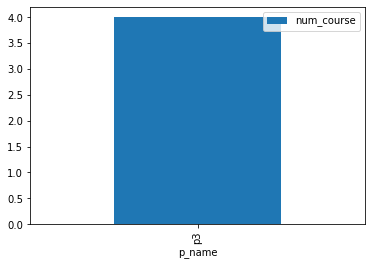

In [15]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='num_course')

In [16]:
sql = """
    insert into student(s_email,s_name,major)
    values('{}', '{}', '{}')
    """.format('s5@jmu.edu','s5','g5')

print(sql)


    insert into student(s_email,s_name,major)
    values('s5@jmu.edu', 's5', 'g5')
    


In [6]:
cur=conn.cursor()

In [18]:
cur.execute(sql)

In [19]:
conn.commit()

In [7]:
df=pandas.read_sql_query('select * from student',conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,g5


In [8]:
sql = """
    insert into professor(p_email,p_name,office)
    values('{}', '{}', '{}')
    """.format('p4@jmu.edu', 'p4', 'o4')

In [9]:
cur.execute(sql)

In [10]:
conn.commit()

In [11]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p1@jmu.edu,p1,o1
1,p2@jmu.edu,p2,o2
2,p3@jmu.edu,p3,o3
3,p4@jmu.edu,p4,o4


In [15]:
sql = """
    insert into course(c_number,c_name,room,p_email)
    values('{}', '{}', '{}', '{}')
    """.format('c5', 'linkedin', 'r2', 'p4@jmu.edu')

In [16]:
cur.execute(sql)

In [14]:
conn.rollback()

In [17]:
conn.commit()

In [18]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p3@jmu.edu
1,c2,mongodb,r2,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c4,facebook,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [19]:
sql = """
    update course
    set p_email = '{}'
    where p_email = '{}'
""".format('p4@jmu.edu', 'p2@jmu.edu')

In [20]:
cur.execute(sql)

In [21]:
conn.commit()

In [22]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p3@jmu.edu
1,c2,mongodb,r2,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c4,facebook,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [23]:
sql = """
delete from professor
where p_email = '{}'
""".format('p2@jmu.edu')


In [24]:
cur.execute(sql)

In [25]:
conn.commit()

In [26]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p1@jmu.edu,p1,o1
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [28]:
cur.close()
conn.close()